In [17]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from src.utils import get_layout, distribute, show_group, int2bin, bin2int, flatten, show_heatmap
from src.QRMcode import QuantumReedMuller
from src.build_circuit import build_QRM_circuit
import numpy as np
import scipy as sp
import itertools


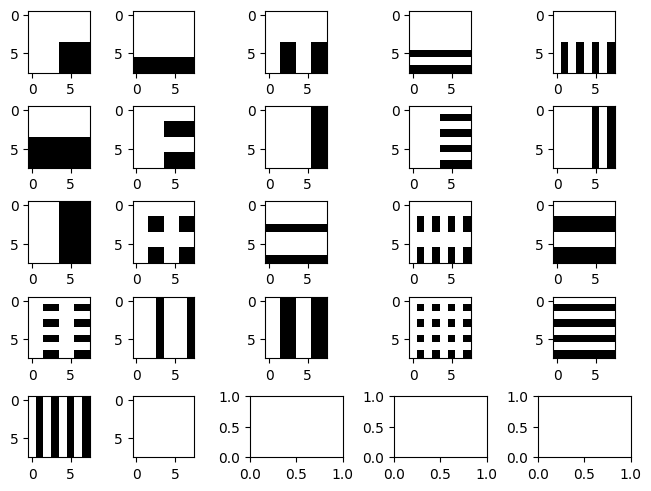

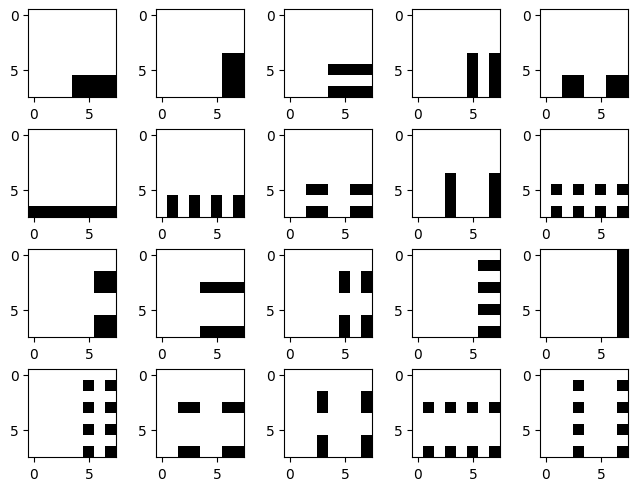

In [18]:
QRM = QuantumReedMuller(2, 2, 6)
gauge=[]
for row in QRM.LZ:
    A=distribute(row)
    gauge.append(A)

stab = []
for row in QRM.SZ:
    stab.append(distribute(row))

#twelve_gauge = [gauge[0], gauge[1], gauge[2], gauge[3], gauge[4], gauge[10], gauge[9], gauge[15], gauge[16], gauge[17], gauge[18], gauge[19]]

show_group(stab, 5)
show_group(gauge, 5)
#show_group(twelve_gauge, 5)


In [19]:
#def gen_pattern(poly, check):
#    pattern = list(range(2**6))
#    for i, number in enumerate(pattern):
#            binary = int2bin(number, 6)
#            #print(f"bianry={binary}, number={number}")
#            if binary[poly[0]-1]==check[0] and binary[poly[1]-1]==check[1] and binary[poly[2]-1]==check[2]:
#                pattern[i]=1
#            else:
#                pattern[i]=0
#    return pattern

#checks = list(int2bin(i, 3) for i in range(int(64**(1/2))))
#lista = []
#for poly in polynomials:
#    lista.append(distribute(gen_pattern(poly, [0,0,0])))
#show_group(lista, 6)

(20, 64)
All stabilizers have weight reduced from the gauges
(8, 64)


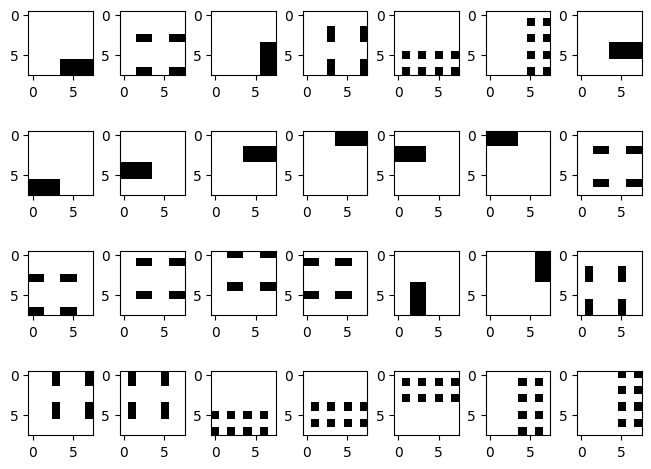

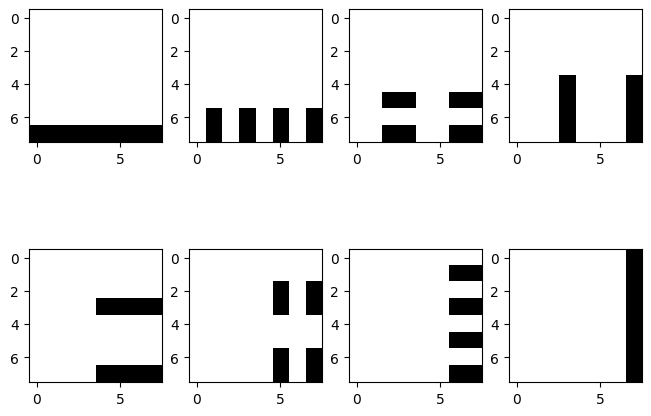

In [20]:
QRM = QuantumReedMuller(2, 2, 6)
print(np.shape(QRM.LZ))

polynomials = [[1,2,3], [3,4,5], [1,2,4], [3,4,6], [1,5,6], [2,5,6]]

#polynomials=[[1,2,3], [3,4,5]]
QRM.gauge_operators(polynomials)
gauge=[]
new_stabs=[]
new_logical=[]
for row in QRM.G:
    gauge.append(distribute(row))
for row in QRM.GS:
    new_stabs.append(distribute(row))
for row in QRM.LZ:
    new_logical.append(distribute(row))
print(np.shape(QRM.LZ))
show_group(new_stabs, 7)
show_group(new_logical, 4)
#show_group(gauge, 3)
#show_heatmap(new_stabs)

In [21]:
aggregate_matrix = [[1,0,0,0,0,0,1,  0,0,0,0,0,0,0,  0,0,0,0,0,0,0,  0,0,0,0,0,0,0],
                    [1,0,0,0,0,0,0,  1,0,0,0,0,0,0,  0,0,0,0,0,0,0,  0,0,0,0,0,0,0],
                    [0,0,1,0,0,0,0,  0,0,0,0,0,0,0,  0,0,0,0,1,0,0,  0,0,0,0,0,0,0],
                    [0,0,0,0,1,0,0,  0,0,0,0,0,0,0,  0,0,0,0,0,0,0,  0,0,1,0,0,0,0],
                    [0,0,0,0,1,0,0,  0,0,0,0,0,0,0,  0,0,0,0,0,0,0,  0,0,0,1,0,0,0],
                    [1,0,0,0,0,0,1,  1,1,0,0,0,0,0,  0,0,0,0,0,0,0,  0,0,0,0,0,0,0],
                    [1,0,0,0,0,0,0,  ]] #started manually but never finished, kept for comparsion

(28, 64)


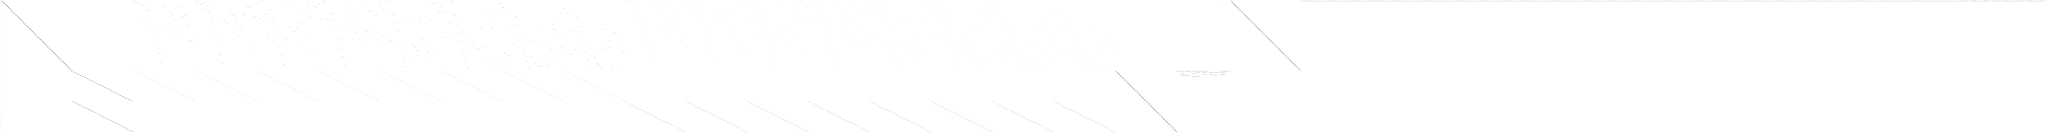

In [22]:

print(np.array(QRM.GS).shape)
circuit = build_QRM_circuit(QRM, 0.001, 1)
circuit.diagram("timeline-svg")


In [23]:

dem = circuit.detector_error_model()